In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cbook as cbook
import matplotlib.image as image
from skimage.transform import resize
import numpy as np
import pandas as pd

In [3]:
# Enable the cache by providing the name of the cache folder
ff1.Cache.enable_cache('cache') 

In [4]:
year, grand_prix, session = 2022, 'Saudi Arabia', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load() # This is new with Fastf1 v.2.2

# This is how it used to be:
# laps = quali.load_laps(with_telemetry=True)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '55', '1', '31', '63', '14', '77', '10', '20', '4', '3', '24', '47', '18', '44', '23', '27', '6', '22']


In [5]:
driver_1, driver_2 = 'PER', 'LEC'

In [6]:
# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

In [7]:
# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

In [8]:
# Extract the delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)


In [9]:
plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

In [25]:
tm1 = quali.get_driver(driver_1).TeamName
tm1 = tm1.lower().replace(" ", "")
print(tm1)
tm2 = quali.get_driver(driver_2).TeamName
tm2 = tm2.lower().replace(" ", "")
print(tm2)

redbullracing
ferrari


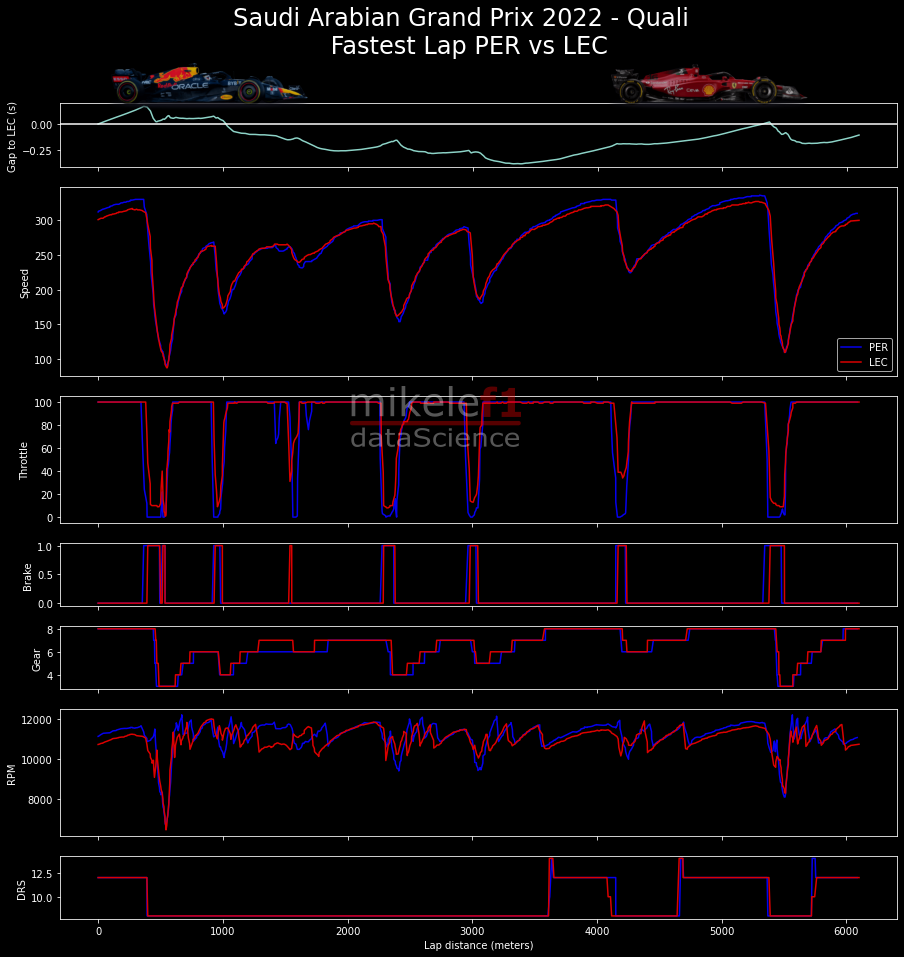

In [36]:
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

car1 = image.imread('./images/'+tm1+'.png')
res1 = resize(car1, (97/1.5, 329/1.5))

car2 = image.imread('./images/'+tm2+'.png')
res2 = resize(car2, (97/1.5, 329/1.5))

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

plt.rcParams['figure.figsize'] = [15, 8]

plt.suptitle(f"{quali.event['EventName']} {quali.event.year} - Quali \n Fastest Lap {driver_1} vs {driver_2}"
             , size=24, y=0.97)

#Modo oscuro
plt.style.use('dark_background')

# Set the plot title
#ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

fig.figimage(im, xo=350, yo=510, zorder=13, alpha=.35)
fig.figimage(res1, xo=100, yo=840, origin='upper', alpha=.80)
fig.figimage(res2, xo=600, yo=840, origin='upper', alpha=.80)
# Store figure
#plt.savefig(plot_filename, dpi=300)
plt.show()